In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from fashion_mnist.utils.mnist_reader import load_mnist

In [3]:
total_train_image, total_train_labels = load_mnist('./fashion_mnist/data/fashion/', kind='train')
test_image, test_labels = load_mnist('./fashion_mnist/data/fashion/', kind='t10k')

In [4]:
ones_array_train = np.ones((total_train_image.shape[0], 1), dtype=int)
ones_array_test = np.ones((test_image.shape[0], 1), dtype=int)

In [5]:
total_train_image = np.hstack((ones_array_train,total_train_image))
test_image = np.hstack((ones_array_test,test_image))

In [6]:
train_image, validation_image = train_test_split(total_train_image, test_size=0.15, random_state=0)
train_labels, validation_labels = train_test_split(total_train_labels, test_size=0.15, random_state=0)

In [7]:
train_labels_onehot = pd.get_dummies(train_labels)
validation_labels_onehot = pd.get_dummies(validation_labels)
test_labels_onehot = pd.get_dummies(test_labels)

In [8]:
def cross_entropy(y, h):
    return tf.reduce_mean(tf.reduce_sum(-tf.log(h)*y,1, keepdims=True))

def pred_y(X,theta):
    return tf.tensordot(X,theta, 1)

def softmax(z):
    exp_num = tf.exp(z)
    sum_div = tf.reduce_sum(exp_num,1, keepdims=True)
    return exp_num / sum_div

In [9]:
lr = 0.000001
batch = train_image.shape[0]
epochs = 1000
iterations = int(train_image.shape[0]/batch)

In [10]:
#plt.imshow(test_image[30][1:].reshape(28,28))

In [11]:
X = tf.placeholder(tf.float32, shape =([None,28*28+1]))
y = tf.placeholder(tf.float32, shape =([None, 10]))

In [12]:
theta = tf.get_variable("theta", shape=(28*28+1,10), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [13]:
gradient = tf.get_variable("gradient", shape=(28*28+1,10), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [14]:
z = pred_y(X,theta)

In [15]:
h = softmax(z)

In [16]:
loss = cross_entropy(y,h)

In [17]:
gradient_update = gradient.assign(tf.tensordot(tf.transpose(X), tf.subtract(h, y),1))

In [18]:
theta_update = theta.assign(theta - lr * gradient)

In [19]:
tf_X = tf.placeholder(tf.float32)
tf_X_norm = tf.image.per_image_standardization(tf_X)

In [20]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)

train_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: train_image})
validation_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: validation_image})
test_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: test_image})

In [21]:
sess.run(tf.global_variables_initializer())

train_epoch_loss_list = []
validation_epoch_loss_list = []

for i in range(epochs):
    batch_accumulate_loss = 0
    
    print('Epoch {}'.format(i))
    for j in range(iterations):
        index = j*batch

        _, _, train_loss_value = sess.run([theta_update,gradient_update, loss], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot[index:index+batch]})
        batch_accumulate_loss += train_loss_value

    train_epoch_loss = batch_accumulate_loss/iterations
    train_epoch_loss_list.append(train_epoch_loss)
    validation_epoch_loss = sess.run(loss, feed_dict={X:validation_image_norm, y:validation_labels_onehot})
    validation_epoch_loss_list.append(validation_epoch_loss)

    print('Training loss:')
    print(train_epoch_loss)
    print('Validation loss:')
    print(validation_epoch_loss)

Epoch 0
Iteration loss:
2.8456807136535645
Validation loss:
2.8655095
Epoch 1
Iteration loss:
1.838281273841858
Validation loss:
1.8386788
Epoch 2
Iteration loss:
1.456784963607788
Validation loss:
1.4564409
Epoch 3
Iteration loss:
1.274405598640442
Validation loss:
1.2717361
Epoch 4
Iteration loss:
1.1898375749588013
Validation loss:
1.1889353
Epoch 5
Iteration loss:
1.1059026718139648
Validation loss:
1.103304
Epoch 6
Iteration loss:
1.096561312675476
Validation loss:
1.0965673
Epoch 7
Iteration loss:
1.0279185771942139
Validation loss:
1.0262986
Epoch 8
Iteration loss:
1.0299631357192993
Validation loss:
1.0305824
Epoch 9
Iteration loss:
0.9734983444213867
Validation loss:
0.97214496
Epoch 10
Iteration loss:
0.9748616814613342
Validation loss:
0.9758114
Epoch 11
Iteration loss:
0.9281287789344788
Validation loss:
0.9266004
Epoch 12
Iteration loss:
0.9320710897445679
Validation loss:
0.93318945
Epoch 13
Iteration loss:
0.8919000625610352
Validation loss:
0.89014214
Epoch 14
Iteration

Iteration loss:
0.5442476272583008
Validation loss:
0.5423732
Epoch 119
Iteration loss:
0.5435539484024048
Validation loss:
0.5416861
Epoch 120
Iteration loss:
0.542868435382843
Validation loss:
0.5410244
Epoch 121
Iteration loss:
0.5421910285949707
Validation loss:
0.5403561
Epoch 122
Iteration loss:
0.5415215492248535
Validation loss:
0.5397082
Epoch 123
Iteration loss:
0.5408597588539124
Validation loss:
0.5390574
Epoch 124
Iteration loss:
0.5402055978775024
Validation loss:
0.5384233
Epoch 125
Iteration loss:
0.5395588278770447
Validation loss:
0.53778887
Epoch 126
Iteration loss:
0.5389193892478943
Validation loss:
0.53716826
Epoch 127
Iteration loss:
0.5382871627807617
Validation loss:
0.5365494
Epoch 128
Iteration loss:
0.5376618504524231
Validation loss:
0.5359421
Epoch 129
Iteration loss:
0.5370435118675232
Validation loss:
0.53533775
Epoch 130
Iteration loss:
0.5364319086074829
Validation loss:
0.5347434
Epoch 131
Iteration loss:
0.5358269214630127
Validation loss:
0.53415304

Iteration loss:
0.4946458041667938
Validation loss:
0.49445856
Epoch 237
Iteration loss:
0.494384229183197
Validation loss:
0.49420965
Epoch 238
Iteration loss:
0.49412423372268677
Validation loss:
0.49396223
Epoch 239
Iteration loss:
0.4938657283782959
Validation loss:
0.4937163
Epoch 240
Iteration loss:
0.4936087727546692
Validation loss:
0.4934719
Epoch 241
Iteration loss:
0.4933532476425171
Validation loss:
0.49322894
Epoch 242
Iteration loss:
0.49309927225112915
Validation loss:
0.49298742
Epoch 243
Iteration loss:
0.4928467273712158
Validation loss:
0.4927474
Epoch 244
Iteration loss:
0.4925956130027771
Validation loss:
0.49250874
Epoch 245
Iteration loss:
0.4923459589481354
Validation loss:
0.49227154
Epoch 246
Iteration loss:
0.49209773540496826
Validation loss:
0.4920357
Epoch 247
Iteration loss:
0.491850882768631
Validation loss:
0.49180132
Epoch 248
Iteration loss:
0.4916054606437683
Validation loss:
0.49156824
Epoch 249
Iteration loss:
0.4913613796234131
Validation loss:
0.

Iteration loss:
0.47219952940940857
Validation loss:
0.47332877
Epoch 350
Iteration loss:
0.4720475971698761
Validation loss:
0.47318777
Epoch 351
Iteration loss:
0.4718962609767914
Validation loss:
0.47304732
Epoch 352
Iteration loss:
0.4717455506324768
Validation loss:
0.47290745
Epoch 353
Iteration loss:
0.47159543633461
Validation loss:
0.4727682
Epoch 354
Iteration loss:
0.47144588828086853
Validation loss:
0.47262946
Epoch 355
Iteration loss:
0.47129690647125244
Validation loss:
0.47249138
Epoch 356
Iteration loss:
0.4711485207080841
Validation loss:
0.47235373
Epoch 357
Iteration loss:
0.4710007607936859
Validation loss:
0.47221678
Epoch 358
Iteration loss:
0.4708534777164459
Validation loss:
0.47208035
Epoch 359
Iteration loss:
0.4707067906856537
Validation loss:
0.47194445
Epoch 360
Iteration loss:
0.4705607295036316
Validation loss:
0.47180915
Epoch 361
Iteration loss:
0.4704151451587677
Validation loss:
0.47167438
Epoch 362
Iteration loss:
0.47027018666267395
Validation loss

Iteration loss:
0.4578542113304138
Validation loss:
0.46017784
Epoch 465
Iteration loss:
0.45775145292282104
Validation loss:
0.46008506
Epoch 466
Iteration loss:
0.45764902234077454
Validation loss:
0.45999256
Epoch 467
Iteration loss:
0.45754683017730713
Validation loss:
0.45990035
Epoch 468
Iteration loss:
0.4574449956417084
Validation loss:
0.45980844
Epoch 469
Iteration loss:
0.4573434293270111
Validation loss:
0.4597168
Epoch 470
Iteration loss:
0.4572422206401825
Validation loss:
0.45962548
Epoch 471
Iteration loss:
0.45714128017425537
Validation loss:
0.45953444
Epoch 472
Iteration loss:
0.45704060792922974
Validation loss:
0.4594437
Epoch 473
Iteration loss:
0.4569401741027832
Validation loss:
0.45935318
Epoch 474
Iteration loss:
0.4568400979042053
Validation loss:
0.45926303
Epoch 475
Iteration loss:
0.4567403197288513
Validation loss:
0.4591731
Epoch 476
Iteration loss:
0.4566407799720764
Validation loss:
0.4590835
Epoch 477
Iteration loss:
0.45654159784317017
Validation los

Iteration loss:
0.4475439786911011
Validation loss:
0.45099363
Epoch 582
Iteration loss:
0.44746828079223633
Validation loss:
0.45092726
Epoch 583
Iteration loss:
0.4473927617073059
Validation loss:
0.45086104
Epoch 584
Iteration loss:
0.4473173916339874
Validation loss:
0.45079502
Epoch 585
Iteration loss:
0.44724225997924805
Validation loss:
0.45072913
Epoch 586
Iteration loss:
0.4471672475337982
Validation loss:
0.45066348
Epoch 587
Iteration loss:
0.4470924437046051
Validation loss:
0.45059794
Epoch 588
Iteration loss:
0.44701775908470154
Validation loss:
0.4505326
Epoch 589
Iteration loss:
0.4469432830810547
Validation loss:
0.45046738
Epoch 590
Iteration loss:
0.44686898589134216
Validation loss:
0.45040235
Epoch 591
Iteration loss:
0.4467948377132416
Validation loss:
0.45033747
Epoch 592
Iteration loss:
0.4467208981513977
Validation loss:
0.4502728
Epoch 593
Iteration loss:
0.446647047996521
Validation loss:
0.45020825
Epoch 594
Iteration loss:
0.4465734660625458
Validation loss

Iteration loss:
0.43954211473464966
Validation loss:
0.44407868
Epoch 702
Iteration loss:
0.4394833743572235
Validation loss:
0.4440287
Epoch 703
Iteration loss:
0.4394247233867645
Validation loss:
0.44397885
Epoch 704
Iteration loss:
0.43936610221862793
Validation loss:
0.44392908
Epoch 705
Iteration loss:
0.43930765986442566
Validation loss:
0.44387943
Epoch 706
Iteration loss:
0.43924930691719055
Validation loss:
0.44382986
Epoch 707
Iteration loss:
0.4391911029815674
Validation loss:
0.4437804
Epoch 708
Iteration loss:
0.439132958650589
Validation loss:
0.44373104
Epoch 709
Iteration loss:
0.43907490372657776
Validation loss:
0.44368184
Epoch 710
Iteration loss:
0.43901702761650085
Validation loss:
0.4436327
Epoch 711
Iteration loss:
0.4389592409133911
Validation loss:
0.44358373
Epoch 712
Iteration loss:
0.4389015734195709
Validation loss:
0.44353476
Epoch 713
Iteration loss:
0.4388439655303955
Validation loss:
0.44348595
Epoch 714
Iteration loss:
0.43878650665283203
Validation lo

Iteration loss:
0.4331938624382019
Validation loss:
0.4387609
Epoch 822
Iteration loss:
0.43314629793167114
Validation loss:
0.43872163
Epoch 823
Iteration loss:
0.4330987334251404
Validation loss:
0.43868247
Epoch 824
Iteration loss:
0.4330512285232544
Validation loss:
0.43864337
Epoch 825
Iteration loss:
0.43300387263298035
Validation loss:
0.43860435
Epoch 826
Iteration loss:
0.4329565763473511
Validation loss:
0.4385654
Epoch 827
Iteration loss:
0.4329092800617218
Validation loss:
0.43852654
Epoch 828
Iteration loss:
0.43286213278770447
Validation loss:
0.43848768
Epoch 829
Iteration loss:
0.4328150749206543
Validation loss:
0.43844894
Epoch 830
Iteration loss:
0.4327680468559265
Validation loss:
0.43841025
Epoch 831
Iteration loss:
0.4327211380004883
Validation loss:
0.4383717
Epoch 832
Iteration loss:
0.43267425894737244
Validation loss:
0.43833318
Epoch 833
Iteration loss:
0.43262743949890137
Validation loss:
0.4382947
Epoch 834
Iteration loss:
0.43258073925971985
Validation los

Iteration loss:
0.42797234654426575
Validation loss:
0.4345206
Epoch 942
Iteration loss:
0.42793259024620056
Validation loss:
0.43448883
Epoch 943
Iteration loss:
0.42789289355278015
Validation loss:
0.4344571
Epoch 944
Iteration loss:
0.4278532564640045
Validation loss:
0.4344254
Epoch 945
Iteration loss:
0.4278136193752289
Validation loss:
0.4343938
Epoch 946
Iteration loss:
0.4277741014957428
Validation loss:
0.43436226
Epoch 947
Iteration loss:
0.4277346134185791
Validation loss:
0.4343307
Epoch 948
Iteration loss:
0.4276951551437378
Validation loss:
0.43429923
Epoch 949
Iteration loss:
0.42765578627586365
Validation loss:
0.4342678
Epoch 950
Iteration loss:
0.4276164472103119
Validation loss:
0.43423647
Epoch 951
Iteration loss:
0.4275771975517273
Validation loss:
0.43420514
Epoch 952
Iteration loss:
0.4275379776954651
Validation loss:
0.43417388
Epoch 953
Iteration loss:
0.42749884724617004
Validation loss:
0.43414265
Epoch 954
Iteration loss:
0.427459716796875
Validation loss:
0

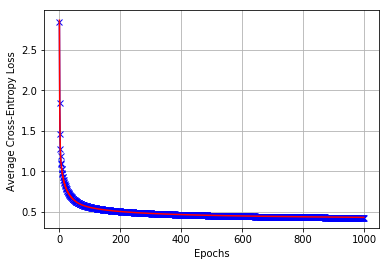

In [22]:
fig = plt.figure(1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Average Cross-Entropy Loss ')
plt.plot(range(len(train_epoch_loss_list)),train_epoch_loss_list, '-bx')
plt.plot(range(len(validation_epoch_loss_list)),validation_epoch_loss_list, '-r')

plt.show()

In [23]:
h_values = sess.run(h, feed_dict={X:test_image_norm})

In [24]:
result_labels = np.zeros_like(h_values,dtype=int)

In [25]:
result_labels[np.arange(len(h_values)), h_values.argmax(1)] = 1

In [26]:
result_labels = np.argmax(result_labels, axis=1)

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(test_labels,result_labels, average='micro')

0.8342

In [29]:
from pandas_ml import ConfusionMatrix

In [30]:
ConfusionMatrix(test_labels,result_labels)

Predicted     0    1    2     3     4    5    6     7     8     9  __all__
Actual                                                                    
0           809    3   14    54     4    5   99     0    12     0     1000
1             4  950    3    29     5    0    7     0     2     0     1000
2            22    3  721     7   142    1   95     0     9     0     1000
3            28   10   12   869    30    1   46     0     4     0     1000
4             0    1  103    38   753    1   95     0     9     0     1000
5             0    0    0     2     0  908    1    57     6    26     1000
6           148    2  124    36   108    3  551     0    28     0     1000
7             0    0    0     0     0   40    0   915     0    45     1000
8             2    2   10    10     2   11   23     6   933     1     1000
9             0    0    0     0     0   22    0    44     1   933     1000
__all__    1013  971  987  1045  1044  992  917  1022  1004  1005    10000